In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
folder_path = r"C:\Users\medici\901"
file_name = "learning1_data.csv"
file_path = os.path.join(folder_path, file_name)

data1 = pd.read_csv(file_path)

print(data1.head())

          0         1         2         3         4         5         6  \
0 -0.202268 -0.353959 -0.119095  0.247844  0.120783 -0.263038 -0.537206   
1  0.809660  0.977984 -0.025524 -1.094791 -1.556198 -0.060669  1.057084   
2 -0.283242 -0.188273 -0.175738 -0.118942 -0.096620  0.050365 -0.066805   
3  0.144290  0.030802  0.245908  0.400738  0.250939  0.376150 -0.265817   
4  0.147031  0.113169  0.218939 -0.442279 -0.780985 -0.673755 -0.355651   

          7         8         9  ...     25591     25592     25593     25594  \
0 -0.576838 -0.453532 -0.279206  ...  0.071124  0.173103  0.548901  0.481414   
1  0.878002  0.246451 -0.800890  ... -0.246382  0.358700  0.048618 -0.172239   
2 -0.234286  0.166423  0.164054  ... -0.197872  0.999439  0.847681  0.051769   
3  0.010329  0.693247 -0.277882  ... -0.855152 -1.051428 -1.167517 -1.048143   
4 -0.073637 -0.030152  0.159664  ... -0.257708 -0.140300  0.295603 -0.060675   

      25595     25596     25597     25598     25599  fault_type  
0 

In [3]:
first_row = data1.iloc[0, :-1].values

### [데이터 셋1]
* FTF (케이지 결함 주파수): 약 707.14 Hz
* BPFO (외륜 결함 주파수): 약 13114.29 Hz
* BPFI (내륜 결함 주파수): 약 8485.71 Hz
* BSF (볼 결함 주파수): 약 4007.14 Hz

In [4]:
import numpy as np
import matplotlib.pyplot as plt
sampling_rate=25600
# Perform FFT on the data
fft_values = np.fft.fft(first_row)
fft_magnitude = np.abs(fft_values)  # Get magnitude of the FFT
n = len(first_row)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)


In [5]:
frequencies.shape

(25600,)

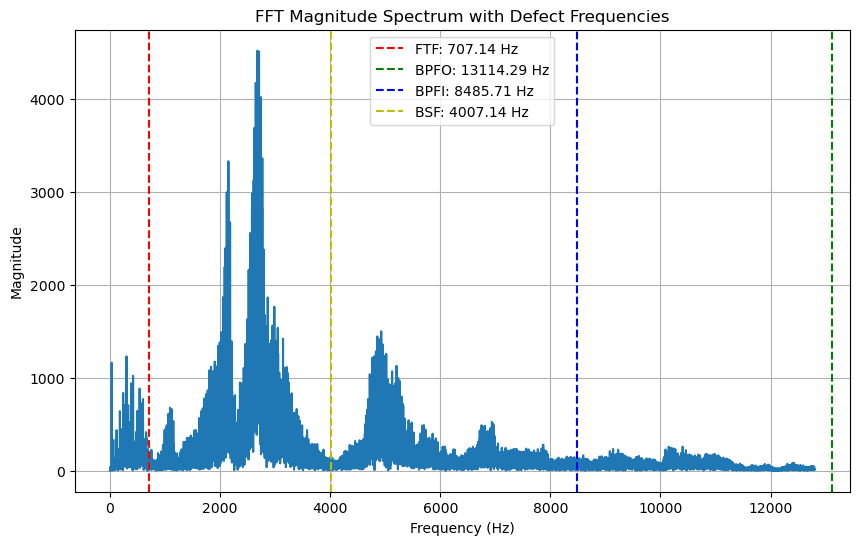

In [51]:
plt.figure(figsize=(10, 6))

# 주파수 대 진폭 그래프 (양수 주파수만 표시)
plt.plot(frequencies[:n//2], fft_magnitude[:n//2])

# 결함 주파수에 대한 선을 추가
plt.axvline(x=ftf_freq, color='r', linestyle='--', label=f'FTF: {ftf_freq} Hz')
plt.axvline(x=bpfo_freq, color='g', linestyle='--', label=f'BPFO: {bpfo_freq} Hz')
plt.axvline(x=bpfi_freq, color='b', linestyle='--', label=f'BPFI: {bpfi_freq} Hz')
plt.axvline(x=bsf_freq, color='y', linestyle='--', label=f'BSF: {bsf_freq} Hz')

# 그래프 레이블과 제목
plt.title('FFT Magnitude Spectrum with Defect Frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show() #정상

In [60]:
fft_values = np.fft.fft(first_row)
fft_magnitude = np.abs(fft_values)  # Get magnitude of the FFT
n = len(first_row)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

In [8]:
pitch_diameter = 34  # mm
ball_diameter = 7.5  # mm
contact_angle = 0  # degrees (cosine of 0 degrees is 1)
ball_count = 12
sampling_rate = 25600  # Hz
rotation_speed_rpm = 1800  # RPM

# 회전 속도를 Hz로 변환 (1초당 회전 수)
rotation_speed_hz = rotation_speed_rpm / 60  # 1분 -> 1초로 변환

# 접촉각의 코사인 값 (0도이므로 1)
cos_contact_angle = np.cos(np.radians(contact_angle))

# BPFO (외륜 결함 주파수)
bpfo = (ball_count / 2) * (rotation_speed_hz) * (1 - (ball_diameter / pitch_diameter) * cos_contact_angle)

# BPFI (내륜 결함 주파수)
bpfi = (ball_count / 2) * (rotation_speed_hz) * (1 + (ball_diameter / pitch_diameter) * cos_contact_angle)

# FTF (케이지 결함 주파수)
ftf = (rotation_speed_hz / 2) * (1 - (ball_diameter / pitch_diameter) * cos_contact_angle)

# BSF (볼 결함 주파수)
bsf = (ball_diameter / pitch_diameter) * (rotation_speed_hz / 2) * (1 - ( (ball_diameter / pitch_diameter) * cos_contact_angle)**2)

bpfo, bpfi, ftf, bsf

(np.float64(140.2941176470588),
 np.float64(219.7058823529412),
 np.float64(11.691176470588236),
 np.float64(3.1478189242825154))

In [23]:
#ftf_freq = 11
bpfo_freq = 140
bpfi_freq = 219.7
bsf_freq = 64.69

In [24]:
# 결함 주파수에 대한 대역폭 (필터링 범위를 설정합니다)
bandwidth = 20  # 예시로 50Hz 대역폭 사용

# 주파수 필터링 (결함 주파수 범위에 해당하는 부분만 선택)
bpfo_range = (frequencies > bpfo_freq - bandwidth) & (frequencies < bpfo_freq + bandwidth)
bpfi_range = (frequencies > bpfi_freq - bandwidth) & (frequencies < bpfi_freq + bandwidth)
#ftf_range = (frequencies > ftf_freq - bandwidth) & (frequencies < ftf_freq + bandwidth)
bsf_range = (frequencies > bsf_freq - bandwidth) & (frequencies < bsf_freq + bandwidth)


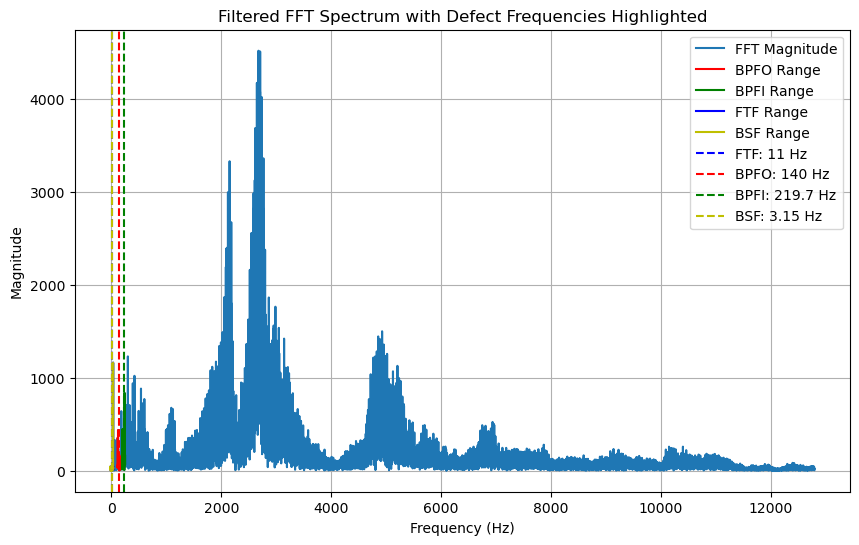

In [17]:
plt.figure(figsize=(10, 6))

# 전체 주파수 스펙트럼 플롯
plt.plot(frequencies[:n//2], fft_magnitude[:n//2], label='FFT Magnitude')

# 결함 주파수 범위 강조 표시
plt.plot(frequencies[bpfo_range], fft_magnitude[bpfo_range], 'r', label='BPFO Range')
plt.plot(frequencies[bpfi_range], fft_magnitude[bpfi_range], 'g', label='BPFI Range')
plt.plot(frequencies[ftf_range], fft_magnitude[ftf_range], 'b', label='FTF Range')
plt.plot(frequencies[bsf_range], fft_magnitude[bsf_range], 'y', label='BSF Range')

# 결함 주파수에 대한 수직선 추가
plt.axvline(x=ftf_freq, color='b', linestyle='--', label=f'FTF: {ftf_freq} Hz')
plt.axvline(x=bpfo_freq, color='r', linestyle='--', label=f'BPFO: {bpfo_freq} Hz')
plt.axvline(x=bpfi_freq, color='g', linestyle='--', label=f'BPFI: {bpfi_freq} Hz')
plt.axvline(x=bsf_freq, color='y', linestyle='--', label=f'BSF: {bsf_freq} Hz')

# 그래프 레이블과 제목
plt.title('Filtered FFT Spectrum with Defect Frequencies Highlighted')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show()

In [25]:
#300까지 자르기
max_freq = 300
freq_range = (frequencies >= 0) & (frequencies <= max_freq)

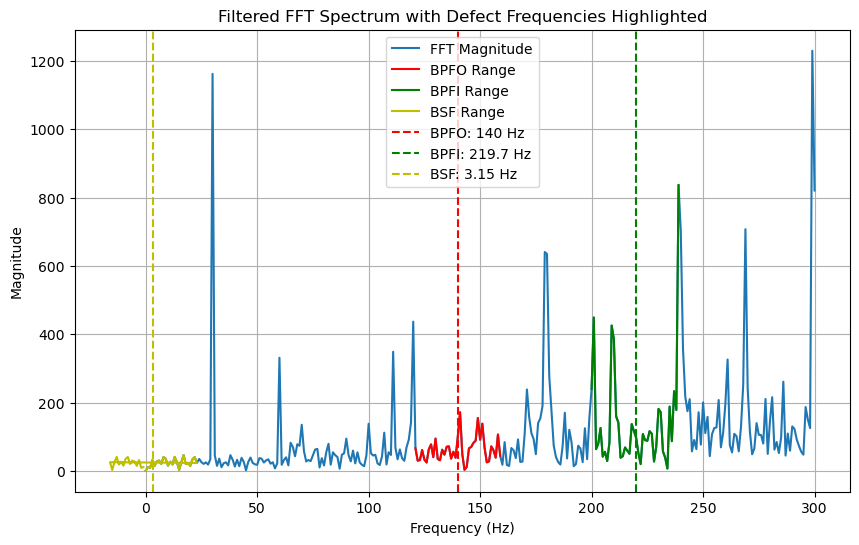

In [26]:
plt.figure(figsize=(10, 6))
# ~300Hz 주파수 스펙트럼 플롯
plt.plot(frequencies[freq_range], fft_magnitude[freq_range], label='FFT Magnitude')

# 결함 주파수 범위 강조 표시
plt.plot(frequencies[bpfo_range], fft_magnitude[bpfo_range], 'r', label='BPFO Range')
plt.plot(frequencies[bpfi_range], fft_magnitude[bpfi_range], 'g', label='BPFI Range')
#plt.plot(frequencies[ftf_range], fft_magnitude[ftf_range], 'b', label='FTF Range')
plt.plot(frequencies[bsf_range], fft_magnitude[bsf_range], 'y', label='BSF Range')

# 결함 주파수에 대한 수직선 추가
#plt.axvline(x=ftf_freq, color='b', linestyle='--', label=f'FTF: {ftf_freq} Hz')
plt.axvline(x=bpfo_freq, color='r', linestyle='--', label=f'BPFO: {bpfo_freq} Hz')
plt.axvline(x=bpfi_freq, color='g', linestyle='--', label=f'BPFI: {bpfi_freq} Hz')
plt.axvline(x=bsf_freq, color='y', linestyle='--', label=f'BSF: {bsf_freq} Hz')

# 그래프 레이블과 제목
plt.title('Filtered FFT Spectrum with Defect Frequencies Highlighted')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show() #내륜결함 BPFI

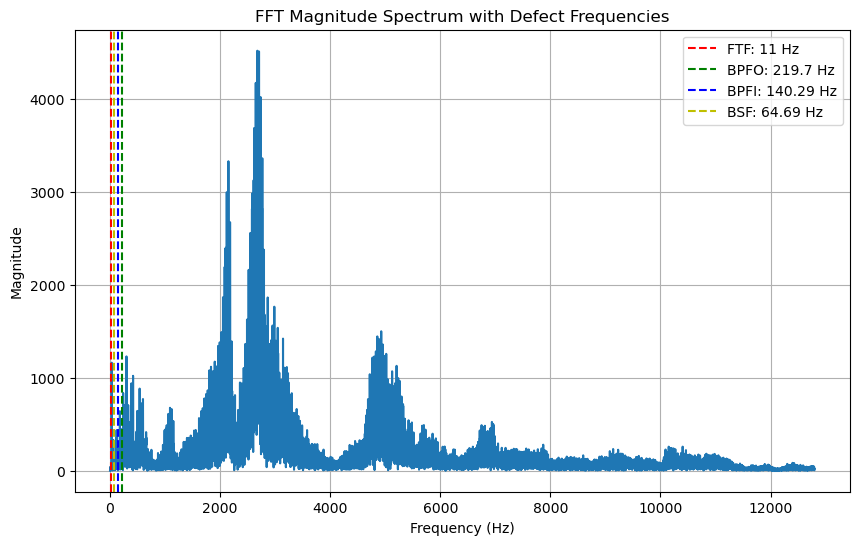

In [7]:
plt.figure(figsize=(10, 6))

# 주파수 대 진폭 그래프 (양수 주파수만 표시)
plt.plot(frequencies[:n//2], fft_magnitude[:n//2])

# 결함 주파수에 대한 선을 추가
plt.axvline(x=ftf_freq, color='r', linestyle='--', label=f'FTF: {ftf_freq} Hz')
plt.axvline(x=bpfo_freq, color='g', linestyle='--', label=f'BPFO: {bpfo_freq} Hz')
plt.axvline(x=bpfi_freq, color='b', linestyle='--', label=f'BPFI: {bpfi_freq} Hz')
plt.axvline(x=bsf_freq, color='y', linestyle='--', label=f'BSF: {bsf_freq} Hz')

# 그래프 레이블과 제목
plt.title('FFT Magnitude Spectrum with Defect Frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show() #롤러

In [27]:
inner_row = data1.iloc[150, :-1].values

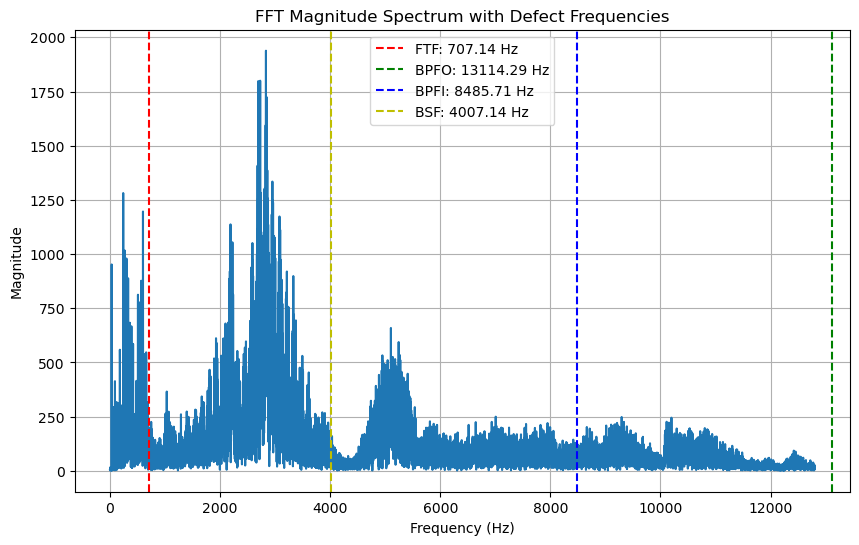

In [53]:
sampling_rate=25600
# Perform FFT on the data
fft_values = np.fft.fft(inner_row)
fft_magnitude = np.abs(fft_values)  # Get magnitude of the FFT
n = len(inner_row)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

plt.figure(figsize=(10, 6))

# 주파수 대 진폭 그래프 (양수 주파수만 표시)
plt.plot(frequencies[:n//2], fft_magnitude[:n//2])

# 결함 주파수에 대한 선을 추가
plt.axvline(x=ftf_freq, color='r', linestyle='--', label=f'FTF: {ftf_freq} Hz')
plt.axvline(x=bpfo_freq, color='g', linestyle='--', label=f'BPFO: {bpfo_freq} Hz')
plt.axvline(x=bpfi_freq, color='b', linestyle='--', label=f'BPFI: {bpfi_freq} Hz')
plt.axvline(x=bsf_freq, color='y', linestyle='--', label=f'BSF: {bsf_freq} Hz')

# 그래프 레이블과 제목
plt.title('FFT Magnitude Spectrum with Defect Frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show() #내륜 BPFI

In [ ]:
plt.figure(figsize=(10, 6))
# ~300Hz 주파수 스펙트럼 플롯
plt.plot(frequencies[freq_range], fft_magnitude[freq_range], label='FFT Magnitude')

# 결함 주파수 범위 강조 표시
plt.plot(frequencies[bpfo_range], fft_magnitude[bpfo_range], 'r', label='BPFO Range')
plt.plot(frequencies[bpfi_range], fft_magnitude[bpfi_range], 'g', label='BPFI Range')
#plt.plot(frequencies[ftf_range], fft_magnitude[ftf_range], 'b', label='FTF Range')
plt.plot(frequencies[bsf_range], fft_magnitude[bsf_range], 'y', label='BSF Range')

# 결함 주파수에 대한 수직선 추가
#plt.axvline(x=ftf_freq, color='b', linestyle='--', label=f'FTF: {ftf_freq} Hz')
plt.axvline(x=bpfo_freq, color='r', linestyle='--', label=f'BPFO: {bpfo_freq} Hz')
plt.axvline(x=bpfi_freq, color='g', linestyle='--', label=f'BPFI: {bpfi_freq} Hz')
plt.axvline(x=bsf_freq, color='y', linestyle='--', label=f'BSF: {bsf_freq} Hz')

# 그래프 레이블과 제목
plt.title('Filtered FFT Spectrum with Defect Frequencies Highlighted')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show() #롤러결함

In [54]:
roller_row = data1.iloc[250, :-1].values

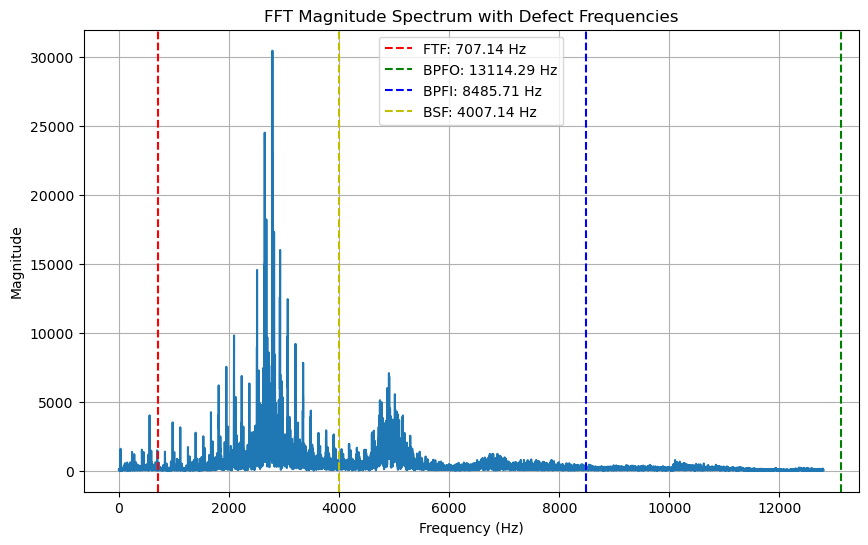

In [55]:
sampling_rate=25600
# Perform FFT on the data
fft_values = np.fft.fft(roller_row)
fft_magnitude = np.abs(fft_values)  # Get magnitude of the FFT
n = len(roller_row)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

plt.figure(figsize=(10, 6))

# 주파수 대 진폭 그래프 (양수 주파수만 표시)
plt.plot(frequencies[:n//2], fft_magnitude[:n//2])

# 결함 주파수에 대한 선을 추가
plt.axvline(x=ftf_freq, color='r', linestyle='--', label=f'FTF: {ftf_freq} Hz')
plt.axvline(x=bpfo_freq, color='g', linestyle='--', label=f'BPFO: {bpfo_freq} Hz')
plt.axvline(x=bpfi_freq, color='b', linestyle='--', label=f'BPFI: {bpfi_freq} Hz')
plt.axvline(x=bsf_freq, color='y', linestyle='--', label=f'BSF: {bsf_freq} Hz')

# 그래프 레이블과 제목
plt.title('FFT Magnitude Spectrum with Defect Frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show() #롤러 BSF

In [56]:
outer_row = data1.iloc[400, :-1].values

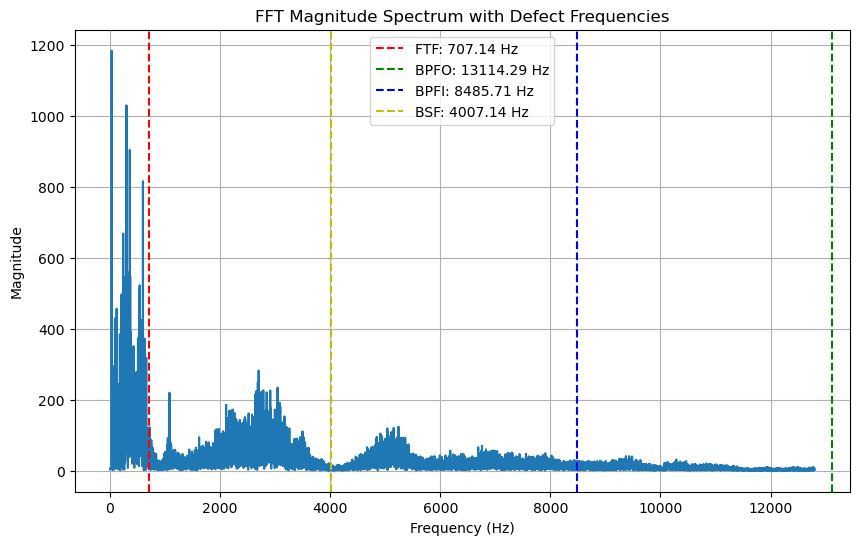

In [57]:
sampling_rate=25600
# Perform FFT on the data
fft_values = np.fft.fft(outer_row)
fft_magnitude = np.abs(fft_values)  # Get magnitude of the FFT
n = len(outer_row)
frequencies = np.fft.fftfreq(n, d=1/sampling_rate)

plt.figure(figsize=(10, 6))

# 주파수 대 진폭 그래프 (양수 주파수만 표시)
plt.plot(frequencies[:n//2], fft_magnitude[:n//2])

# 결함 주파수에 대한 선을 추가
plt.axvline(x=ftf_freq, color='r', linestyle='--', label=f'FTF: {ftf_freq} Hz')
plt.axvline(x=bpfo_freq, color='g', linestyle='--', label=f'BPFO: {bpfo_freq} Hz')
plt.axvline(x=bpfi_freq, color='b', linestyle='--', label=f'BPFI: {bpfi_freq} Hz')
plt.axvline(x=bsf_freq, color='y', linestyle='--', label=f'BSF: {bsf_freq} Hz')

# 그래프 레이블과 제목
plt.title('FFT Magnitude Spectrum with Defect Frequencies')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()

# 그래프 표시
plt.grid(True)
plt.show() #외륜 BPFO